# Importations des libs

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

# Import des données et analyse de fond

In [7]:
dataFile = pd.read_csv("data.csv")
dataFile.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


- Voici donc les 10 premières lignes de notre dataset sur les Pokémons.
- Le DataFrame a 41 colonnes, chacune représente une variable, on a donc 41 variables

In [8]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

- Il y a 801 entrées dans notre dataset. Ils sont classés dans l'ordre du Pokédex (source : mes connaissances personnelles).
- On voit dans le compte de valeurs "non-null" que certaines colonnes ont des valeurs nulles. Ce n'est pas grave dans la mesure où c'est dans des proportions négligeables ou que c'est cohérent avec les variables en question. Par exemple, il est normal que beaucoup de Pokémons n'est pas un double type.


In [9]:
dataFile.dtypes.value_counts()

float64    21
int64      13
object      7
Name: count, dtype: int64

On a une répartition des types telle que :
- 51% de nombres à virgule (float64)
- 32% d'entiers (int64)
- 17% de texte, tableaux... (object)

# Analyse univariée

#### *Visualisation des Pokemon par type*

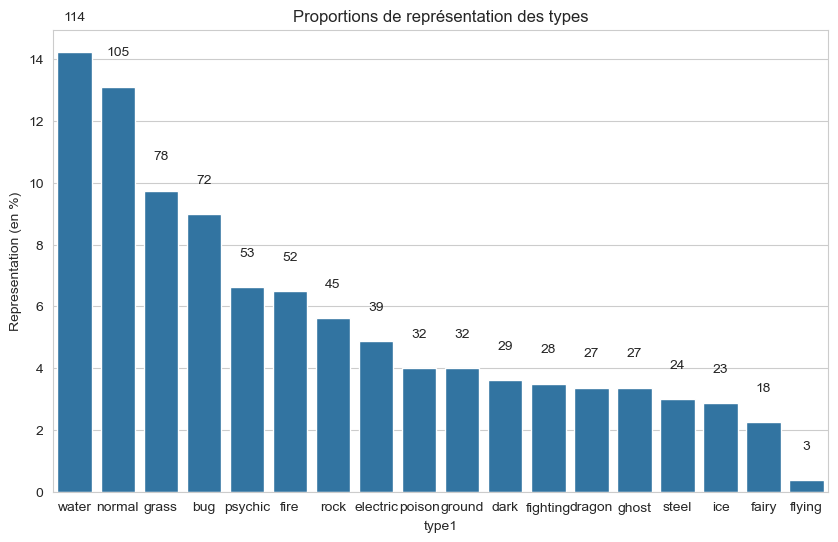

Moyenne de pokémon par type : 44.5


In [10]:
counts = dataFile['type1'].value_counts()
percentage = counts / counts.sum() * 100

# Graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage.index, y=percentage.values)

for i, count in enumerate(counts):
    ax.text(i, percentage.values[i] + 1, f"{count}", ha="center")

plt.ylabel('Representation (en %)')
plt.title('Proportions de représentation des types')
plt.show()

# Mean of the amount of poke per type
print(f"Moyenne de pokémon par type : {801 * np.mean(percentage) / 100:.1f}");

- Le type eau est le plus représenté parmi les Pokémons du dataset avec 114 pokémons de ce type.
- En comparaison, le type Vol est le moins représenté avec environ 3 individus, ce qui nous fait une étendue de 111 pokémons.
- On a environ 44.5 Pokémons par type.

#### *Visualisation de la proportion de Pokémon légendaires*

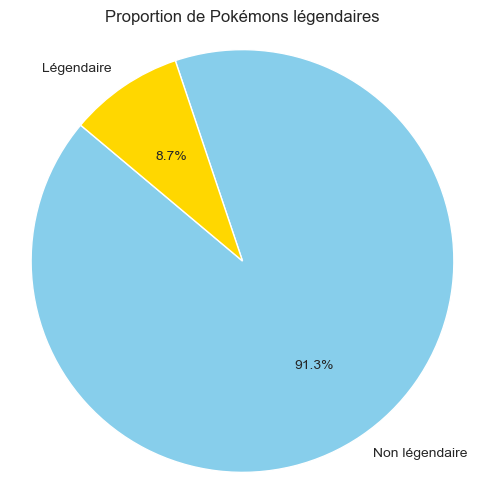

In [11]:
legendary_count = dataFile["is_legendary"].value_counts()
labels = ["Non légendaire", "Légendaire"] if 0 in legendary_count.index else legendary_count.index

plt.figure(figsize=(6,6))
plt.pie(legendary_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'gold'])
plt.title("Proportion de Pokémons légendaires")
plt.axis('equal')
plt.show()

- On a 8.7% de Pokémons légendaires dans l'ensemble de notre dataset.
- Conséquemment, on trouve 91.3% de Pokémons normaux.

#### *Top 10 des talents les plus répendues*

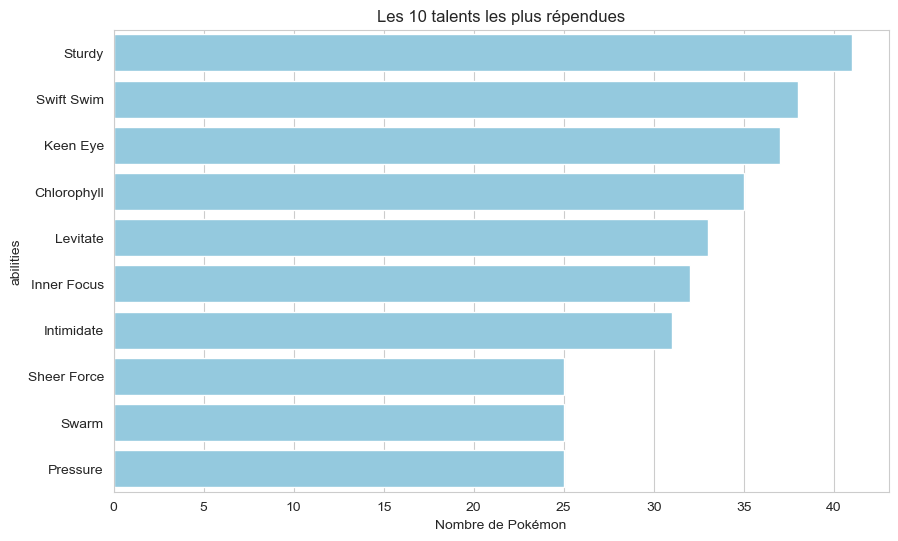

In [12]:
dataFile['abilities'] = dataFile['abilities'].apply(ast.literal_eval)
all_skills = dataFile['abilities'].explode()
skill_counts = all_skills.value_counts().head(10)

# Graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, color='skyblue')
plt.xlabel("Nombre de Pokémon")
plt.title("Les 10 talents les plus répendues")
plt.show()

- On a récupéré les 10 talents les plus répendues parmi les Pokémons du dataset.
- Sturdy est le talent le plus utilisé, on peut présumer qu'il est répendu parmi les pokémons eau ou alors parmi les pokémons les plus communs.

#### *Statistiques sur le temps d'éclosion de Pokémon*

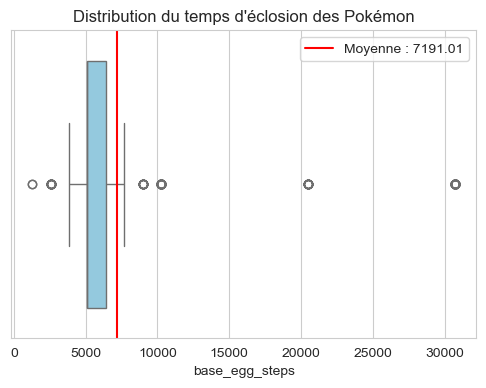

In [13]:
plt.figure(figsize=(6, 4))
vals = dataFile['base_egg_steps'].dropna().astype(int)
sns.boxplot(x=vals, color='skyblue')
plt.title('Distribution du temps d\'éclosion des Pokémon')

mean_val = dataFile['base_egg_steps'].mean()
plt.axvline(mean_val, color='red', label=f"Moyenne : {mean_val:.2f}")
plt.legend()
plt.show()

Avec ce visuel, on obtient plusieurs informations.
- Il faut marcher en moyenne 7191 pas pour faire un éclore un oeuf pokémon.
- La médiane est aux alentours de 5500 pas.
- Le gros des valeurs est compris entre environ 4000 et 7500 pas.
- On observe quelques "anomalies", des valeurs qui sortent du lot à 30000, 20000 et 10000 pas et quelques-unes encore plus près des autres valeurs.
- On observe que la médiane et la moyenne sont plutôt éloignées l'une de l'autre. Essayons d'expliquer pourquoi.

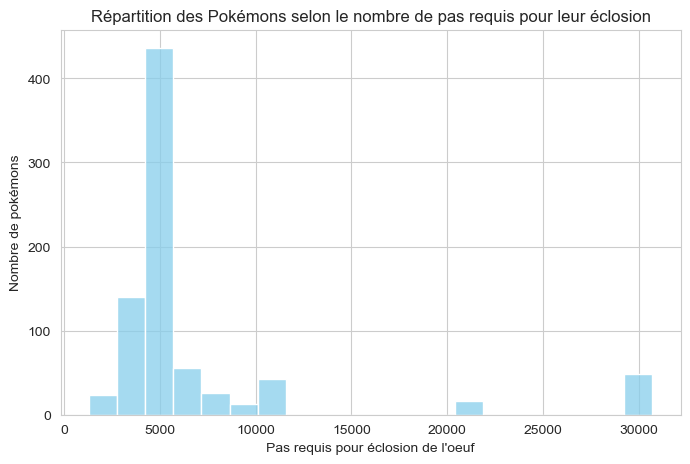

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(dataFile, x='base_egg_steps', bins=20, kde=False, color='skyblue')
plt.xlabel("Pas requis pour éclosion de l'oeuf")
plt.ylabel("Nombre de pokémons")
plt.title("Répartition des Pokémons selon le nombre de pas requis pour leur éclosion")
plt.show()

- On obtient ici plus d'informations sur les "anomalies" visibles dans le précédent visuel. Il y a un nombre assez important de pokémons nécessitant un très grand nombre de pas pour éclore, ce qui tire la moyenne vers le haut et l'éloigne de la médiane.
- Il serait intéressant de se demander si les Pokémons nécessitant beaucoup de pas pour éclore appartiennent à une catégorie particulière.

### Résumés statistiques de quelques variables

##### *Variable base_egg_steps*

In [15]:
dataFile['base_egg_steps'].describe()

count      801.000000
mean      7191.011236
std       6558.220422
min       1280.000000
25%       5120.000000
50%       5120.000000
75%       6400.000000
max      30720.000000
Name: base_egg_steps, dtype: float64

Ces satistiques descriptives nous confirment ce que nous disions précédemment avec des chiffres plus précis. On a en plus l'écart-type (std) qui nous confirme que les valeurs de cette variable sont plutôt dispersées dans notre échantillon.

##### *Variable height_m*

In [16]:
dataFile['height_m'].describe()

count    781.000000
mean       1.163892
std        1.080326
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height_m, dtype: float64

- La variable height_m est très peu dispersé, même si son étendue est plutôt large.
- On a une étendue de 14.4 mètres, pour un écart-type de 1.08 mètre
- La plupart des Pokémon font autour de 1.16 mètre (moyenne). C'est également confirmer par la proximité des 1er et 3ᵉ quartiles.

##### *Variable hp*

In [17]:
dataFile['hp'].describe()

count    801.000000
mean      68.958801
std       26.576015
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

- En nous basant sur l'écart-type et la différence entre les 1er et 3ᵉ quartiles, on constate que les Pokémons ont tous un nombre de points de vie relativement proche, ~69 en moyenne.

# Analyse multivariée

#### *Mise en relation des variable base_egg_steps et is_legendary*

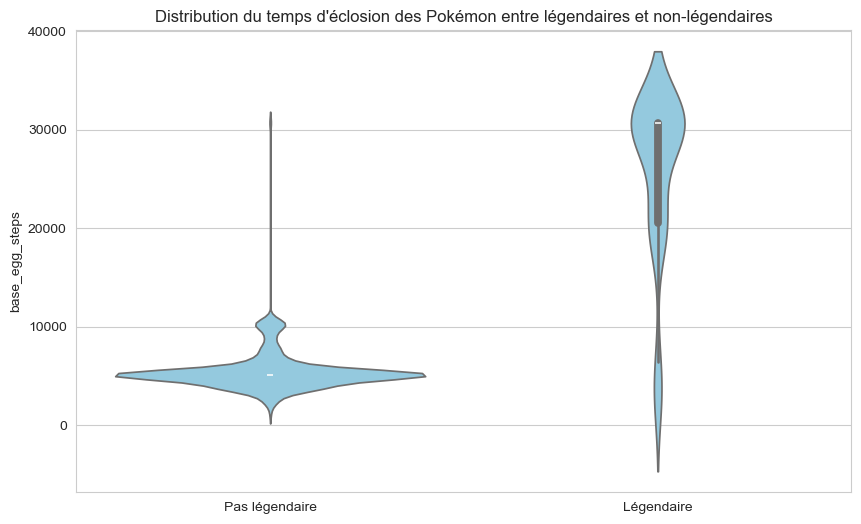

In [29]:
dataFile['legendary_str'] = dataFile['is_legendary'].replace({0: 'Pas légendaire', 1: 'Légendaire'})

plt.figure(figsize=(10, 6))
sns.violinplot(x='legendary_str', y='base_egg_steps', data=dataFile, color='skyblue')

plt.title("Distribution du temps d'éclosion des Pokémon entre légendaires et non-légendaires")
plt.xlabel("")
plt.ylabel("base_egg_steps")
plt.show()

On peut confirmer la conjecture faite plus tôt : les Pokémons légendaires sont ceux qui constituent les anomalies dans la variable base_egg_step. Seuls des Pokémons légendaires ont besoin de plus de 15 000 pas pour éclore.

#### Relation entre les talents des pokémons et leur type ou rareté

Plus tôt, nous avions émis l'hypothèse que les talents les plus utilisés pourraient être plus présents chez les Pokémons de type eau, ces derniers étant plus nombreux. Nous allons donc vérifier ça maintenant.

Nous allons en même temps vérifier si cela peu avoir un rapport avec la rareté du Pokémon en prenant en compte la valeur du "capture rate" dans notre visuel.

In [ ]:
#code